In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
df.drop(columns=['deck','embarked','adult_male','alive','who'],inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
embark_town      2
alone            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  889 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [ ]:
corr =df.corr()


In [ ]:
corr

,survived,pclass,age,sibsp,parch,fare,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.271832
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,1.000000


<AxesSubplot:>

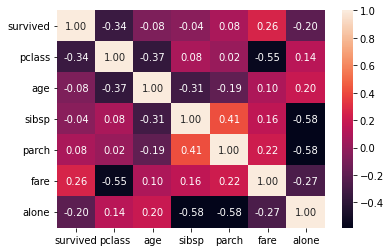

In [ ]:
sns.heatmap(corr,annot=True,fmt='.2f')

In [ ]:
from sklearn.impute import SimpleImputer

num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='most_frequent')

df['age'] = num_impute.fit_transform(df[['age']])
df['embark_town'] = cat_impute.fit_transform(df[['embark_town']])

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
embark_town    0
alone          0
dtype: int64

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,True


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0:1]

In [ ]:
X.sample()

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
278,3,male,7.0,4,1,29.125,Third,Queenstown,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

y_label_encode = LabelEncoder()
y = y_label_encode.fit_transform(y)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
label_classes = y_label_encode.classes_
print(label_classes)

for i,label in enumerate(label_classes):
    print(f"{i}:{label}")

[0 1]
0:0
1:1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
331,1,male,45.5,0,0,28.5000,First,Southampton,True
733,2,male,23.0,0,0,13.0000,Second,Southampton,True
382,3,male,32.0,0,0,7.9250,Third,Southampton,True
704,3,male,26.0,1,0,7.8542,Third,Southampton,False
813,3,female,6.0,4,2,31.2750,Third,Southampton,False


In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


one_hoe_encoders = ['class','embark_town','sex','alone']
numerical_columns = ['age','fare']

scaler = StandardScaler()
ohe_encode = OneHotEncoder(drop='first',sparse=False)



clf_tranformer = ColumnTransformer(
    transformers= [
        ('ohe',ohe_encode,one_hoe_encoders),
        ('scaler',scaler,numerical_columns)
        
    ],remainder='passthrough'
)


In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps= [
        ('preprocessing',clf_tranformer)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

algorithms = {
    "random_forest": RandomForestClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "svm": SVC(),
    "lg": LogisticRegression(),
    "xgboost": xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')

}

results = {}
piepline_results = {}

for name,algo in algorithms.items():
    piepline = Pipeline(
        steps= [
            ('preprocessor',preprocessor),
            ('algorithms',algo)
        ]
    )

    piepline.fit(X_train,y_train)

    joblib.dump(piepline,f"{name}.pkl")
    piepline_results[name] =piepline

    y_pred = piepline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    cf_matrix = confusion_matrix(y_test,y_pred)
    cv = cross_val_score(piepline,X_train,y_train,cv=5)
    cv_mean = cv.mean()

    results[name] = {
        "accuracy": accuracy,
        "clf_report": clf_report,
        'cf_matrix': cf_matrix,
        'cv': cv,
        'cv_mean': cv_mean
    }

    print(f"{name}")
    print(f"Accuracy for {name}: {accuracy}")
    print(f"Classification Report for {name}: \n{clf_report}")
    print(f"Confusion Matrix for {name}: \n{cf_matrix}")
    print(f"Cross Validation for {name}: {cv}")
    print(f"Cross Validation  Mean for {name}: {cv_mean}")
    print('-'*50)





random_forest
Accuracy for random_forest: 0.8212290502793296
Classification Report for random_forest: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix for random_forest: 
[[89 16]
 [16 58]]
Cross Validation for random_forest: [0.7972028  0.75524476 0.80985915 0.77464789 0.84507042]
Cross Validation  Mean for random_forest: 0.796405003447257
--------------------------------------------------
decision_tree
Accuracy for decision_tree: 0.7821229050279329
Classification Report for decision_tree: 
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78

## Hyperparameters:V1

random_forest
Best Params: {'algorithms__max_depth': 5, 'algorithms__n_estimators': 100}
Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[90 15]
 [20 54]]
--------------------------------------------------
decision_tree
Best Params: {'algorithms__max_depth': 3}
Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion

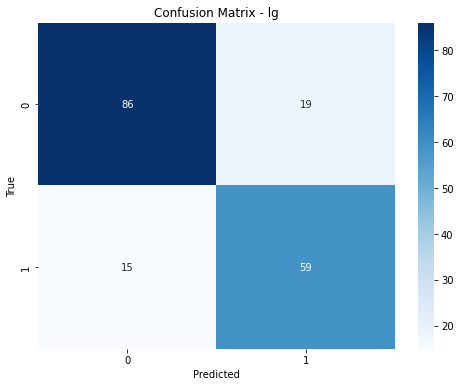

In [ ]:
# %%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = sns.load_dataset('titanic')

# Drop irrelevant columns
df.drop(columns=['deck', 'embarked', 'adult_male', 'alive', 'who'], inplace=True)

# Handle missing values
num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='most_frequent')
df['age'] = num_impute.fit_transform(df[['age']])
df['embark_town'] = cat_impute.fit_transform(df[['embark_town']])

# Feature engineering
df['family_size'] = df['sibsp'] + df['parch']
df.drop(columns=['sibsp', 'parch'], inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df['survived'] = label_encoder.fit_transform(df['survived'])

# Split data
X = df.drop(columns=['survived'])
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_cols = ['pclass', 'sex', 'embark_town', 'class', 'alone']
numerical_cols = ['age', 'fare', 'family_size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Algorithms
algorithms = {
    "random_forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "decision_tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "svm": SVC(probability=True, random_state=42, class_weight='balanced'),
    "lg": LogisticRegression(random_state=42, class_weight='balanced'),
    "xgboost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

# Hyperparameter tuning
param_grids = {
    "random_forest": {'algorithms__n_estimators': [50, 100, 200], 'algorithms__max_depth': [3, 5, 10]},
    "decision_tree": {'algorithms__max_depth': [3, 5, 10]},
    "svm": {'algorithms__C': [0.1, 1, 10], 'algorithms__kernel': ['linear', 'rbf']},
    "lg": {'algorithms__C': [0.1, 1, 10]},
    "xgboost": {'algorithms__n_estimators': [50, 100, 200], 'algorithms__max_depth': [3, 5, 10]}
}

for name, algo in algorithms.items():
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('algorithms', algo)
        ]
    )
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": cf_matrix
    }

    print(f"{name}")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{clf_report}")
    print(f"Confusion Matrix:\n{cf_matrix}")
    print("-" * 50)

# %%
# Plot Confusion Matrix for the best model
import seaborn as sns

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
conf_matrix = results[best_model_name]['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Hyperparameters:v2